<span style='font-family:serif'> <font size="8"> <span style='color:#6600CC'> Oceanspy and Poseidon Viewer.

    
<span style='font-family:serif'> <font size="4.5"> Example notebook

In [1]:
import oceanspy as ospy
import xarray as xr
import numpy as np
from poseidon_viewer import get_shapes
import copy as _copy
import dask
import dask.multiprocessing

import warnings
warnings.filterwarnings('ignore')

import xoak as _xoak
from xarray import DataArray

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5

In [2]:
from dask.distributed import Client
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39089,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:45170,Total threads: 1
Dashboard: http://127.0.0.1:44375/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:41694,


In [3]:
od = ospy.open_oceandataset.from_catalog('ECCO')
od._ds = od._ds.drop_vars({'k', 'k_u', 'k_p1', 'k_l'})
co_list = [var for var in od._ds.variables if "time" not in od._ds[var].dims]
od._ds = od._ds.set_coords(co_list)

Opening ECCO.
ECCO v4r4 3D dataset, ocean simulations on LLC90 grid (monthly mean output)


In [4]:
points = [{"type":"Point","coordinates":[-186.30895766364205,45.997065665998235]},{"type":"Point","coordinates":[-177.70518407873635,34.27641832009816]},{"type":"Point","coordinates":[-208.27122181458543,17.887813379018667]},{"type":"Point","coordinates":[-181.32782558817036,16.155919260064564]},{"type":"Point","coordinates":[-152.79952370137786,13.969713020398984]},{"type":"Point","coordinates":[-148.49763690892505,26.067097018569513]},{"type":"Point","coordinates":[-155.29008973911374,36.309032158084094]},{"type":"Point","coordinates":[-133.7806557768496,38.11208362420939]},{"type":"Point","coordinates":[-122.23348596552883,9.090700548691416]},{"type":"Point","coordinates":[-100.27122181458543,-23.052715582369387]},{"type":"Point","coordinates":[0.2570800722070334,-46.522997962607825]},{"type":"Point","coordinates":[-98.23348596552881,-49.84257375048559]},{"type":"Point","coordinates":[-129.25235389005715,-34.716752922033]},{"type":"Point","coordinates":[-163.21461804100053,-32.07069120179737]},{"type":"Point","coordinates":[-145.78065577684958,-14.70671264522342]}]

In [5]:
points

[{'type': 'Point', 'coordinates': [-186.30895766364205, 45.997065665998235]},
 {'type': 'Point', 'coordinates': [-177.70518407873635, 34.27641832009816]},
 {'type': 'Point', 'coordinates': [-208.27122181458543, 17.887813379018667]},
 {'type': 'Point', 'coordinates': [-181.32782558817036, 16.155919260064564]},
 {'type': 'Point', 'coordinates': [-152.79952370137786, 13.969713020398984]},
 {'type': 'Point', 'coordinates': [-148.49763690892505, 26.067097018569513]},
 {'type': 'Point', 'coordinates': [-155.29008973911374, 36.309032158084094]},
 {'type': 'Point', 'coordinates': [-133.7806557768496, 38.11208362420939]},
 {'type': 'Point', 'coordinates': [-122.23348596552883, 9.090700548691416]},
 {'type': 'Point', 'coordinates': [-100.27122181458543, -23.052715582369387]},
 {'type': 'Point', 'coordinates': [0.2570800722070334, -46.522997962607825]},
 {'type': 'Point', 'coordinates': [-98.23348596552881, -49.84257375048559]},
 {'type': 'Point', 'coordinates': [-129.25235389005715, -34.71675292

In [6]:
point = [{"type":"Point","coordinates":[-186.30895766364205,45.997065665998235]}]

In [7]:
lon, lat = ospy.utils.viewer_to_range(point)

extracting Point


In [8]:
lons, lats = ospy.utils.viewer_to_range(points)

extracting Point


In [9]:
lats

[45.997065665998235,
 34.27641832009816,
 17.887813379018667,
 16.155919260064564,
 13.969713020398984,
 26.067097018569513,
 36.309032158084094,
 38.11208362420939,
 9.090700548691416,
 -23.052715582369387,
 -46.522997962607825,
 -49.84257375048559,
 -34.716752922033,
 -32.07069120179737,
 -14.70671264522342]

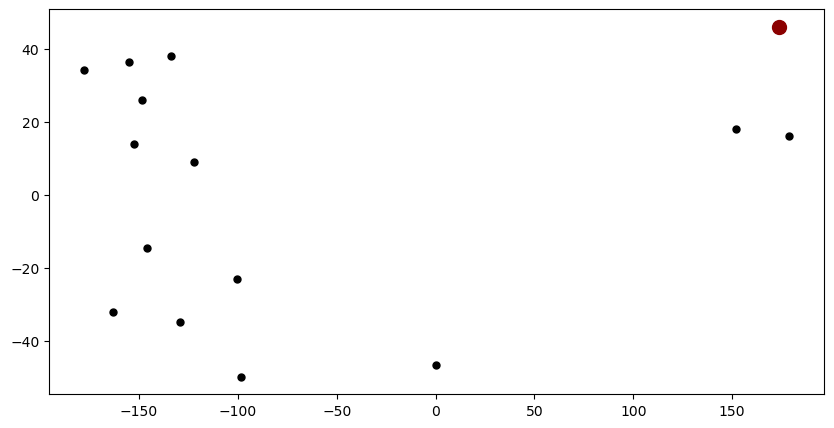

In [10]:
plt.plot(lons, lats, 'k', ls='',  marker='o', markersize=5)
plt.plot(lon, lat, 'darkred', marker='o', markersize=10)
plt.show()

## collection of data points

In [11]:
od_many = od.subsample.stations(Ycoords=lats, Xcoords=lons)

Extracting stations.


In [12]:
od_many._ds

<xarray.Dataset>
Dimensions:     (time: 312, Zl: 50, station: 15, Z: 50, time_midp: 311,
                 Zp1: 51, Zu: 50, nv: 2)
Coordinates: (12/43)
    CS          (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
    Depth       (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
    ETAN_snap   (time_midp, station) float32 dask.array<chunksize=(1, 15), meta=np.ndarray>
    GEOFLX      (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
    PHrefC      (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF      (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    ...          ...
    rAz         (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    time_bnds   (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
  * time_midp   (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    timestep    (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * station     (station) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
Dimensions without coordinates: nv
Data variables: (12/26)
    ADVr_SLT    (time, Zl, station) float32 dask.array<chunksize=(1, 50, 15), meta=np.ndarray>
    ADVr_TH     (time, Zl, station) float32 dask.array<chunksize=(1, 50, 15), meta=np.ndarray>
    ADVx_SLT    (time, Z, station) float32 dask.array<chunksize=(1, 50, 15), meta=np.ndarray>
    ADVx_TH     (time, Z, station) float32 dask.array<chunksize=(1, 50, 15), meta=np.ndarray>
    ADVy_SLT    (time, Z, station) float32 dask.array<chunksize=(1, 50, 15), meta=np.ndarray>
    ADVy_TH     (time, Z, station) float32 dask.array<chunksize=(1, 50, 15), meta=np.ndarray>
    ...          ...
    UVELMASS    (time, Z, station) float32 dask.array<chunksize=(1, 50, 15), meta=np.ndarray>
    VVELMASS    (time, Z, station) float32 dask.array<chunksize=(1, 50, 15), meta=np.ndarray>
    WVELMASS    (time, Zl, station) float32 dask.array<chunksize=(1, 50, 15), meta=np.ndarray>
    oceFWflx    (time, station) float32 dask.array<chunksize=(1, 15), meta=np.ndarray>
    oceQsw      (time, station) float32 dask.array<chunksize=(1, 15), meta=np.ndarray>
    oceSPtnd    (time, Z, station) float32 dask.array<chunksize=(1, 50, 15), meta=np.ndarray>
Attributes: (12/16)
    date_created:               Mon Dec 30 11:13:26 2019
    geospatial_lat_max:         90.0
    geospatial_lat_min:         -90.0
    geospatial_lon_max:         180.0
    geospatial_lon_min:         -179.9991912841797
    geospatial_vertical_max:    -5.0
    ...                         ...
    title:                      ECCOv4 MITgcm grid information
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              ECCO_v4r4
    OceanSpy_description:       ECCO v4r4 3D dataset, ocean simulations on LL...
    OceanSpy_grid_coords:       {'Z': {'Z': None, 'Zp1': 0.5, 'Zu': 0.5, 'Zl'...
    OceanSpy_face_connections:  None

## single data points

In [13]:
od_single = od.subsample.stations(Ycoords=lat, Xcoords=lon)

Extracting stations.


In [14]:
od_single._ds

<xarray.Dataset>
Dimensions:     (time: 312, Zl: 50, station: 1, Z: 50, time_midp: 311, Zp1: 51,
                 Zu: 50, nv: 2)
Coordinates: (12/43)
    CS          (station) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    Depth       (station) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    ETAN_snap   (time_midp, station) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    GEOFLX      (station) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefC      (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF      (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    ...          ...
    rAz         (station) float32 dask.array<chunksize=(1,), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    time_bnds   (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
  * time_midp   (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    timestep    (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * station     (station) int64 0
Dimensions without coordinates: nv
Data variables: (12/26)
    ADVr_SLT    (time, Zl, station) float32 dask.array<chunksize=(1, 50, 1), meta=np.ndarray>
    ADVr_TH     (time, Zl, station) float32 dask.array<chunksize=(1, 50, 1), meta=np.ndarray>
    ADVx_SLT    (time, Z, station) float32 dask.array<chunksize=(1, 50, 1), meta=np.ndarray>
    ADVx_TH     (time, Z, station) float32 dask.array<chunksize=(1, 50, 1), meta=np.ndarray>
    ADVy_SLT    (time, Z, station) float32 dask.array<chunksize=(1, 50, 1), meta=np.ndarray>
    ADVy_TH     (time, Z, station) float32 dask.array<chunksize=(1, 50, 1), meta=np.ndarray>
    ...          ...
    UVELMASS    (time, Z, station) float32 dask.array<chunksize=(1, 50, 1), meta=np.ndarray>
    VVELMASS    (time, Z, station) float32 dask.array<chunksize=(1, 50, 1), meta=np.ndarray>
    WVELMASS    (time, Zl, station) float32 dask.array<chunksize=(1, 50, 1), meta=np.ndarray>
    oceFWflx    (time, station) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    oceQsw      (time, station) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    oceSPtnd    (time, Z, station) float32 dask.array<chunksize=(1, 50, 1), meta=np.ndarray>
Attributes: (12/16)
    date_created:               Mon Dec 30 11:13:26 2019
    geospatial_lat_max:         90.0
    geospatial_lat_min:         -90.0
    geospatial_lon_max:         180.0
    geospatial_lon_min:         -179.9991912841797
    geospatial_vertical_max:    -5.0
    ...                         ...
    title:                      ECCOv4 MITgcm grid information
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              ECCO_v4r4
    OceanSpy_description:       ECCO v4r4 3D dataset, ocean simulations on LL...
    OceanSpy_grid_coords:       {'Z': {'Z': None, 'Zp1': 0.5, 'Zu': 0.5, 'Zl'...
    OceanSpy_face_connections:  None

# look at the data

In [15]:
od_many._ds['THETA'].isel(time=0)

<xarray.DataArray 'THETA' (Z: 50, station: 15)>
dask.array<getitem, shape=(50, 15), dtype=float32, chunksize=(50, 15), chunktype=numpy.ndarray>
Coordinates: (12/33)
    CS        (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
    Depth     (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
    GEOFLX    (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
    PHrefC    (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    SN        (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
    XC        (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
    ...        ...
    rAs       (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
    rAw       (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
    rAz       (station) float32 dask.array<chunksize=(15,), meta=np.ndarray>
    time      datetime64[ns] 1992-01-16T12:00:00
    timestep  int64 dask.array<chunksize=(), meta=np.ndarray>
  * station   (station) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
Attributes:
    long_name:        Potential Temperature
    standard_name:    sea_water_potential_temperature
    units:            degC
    original_output:  monthly mean

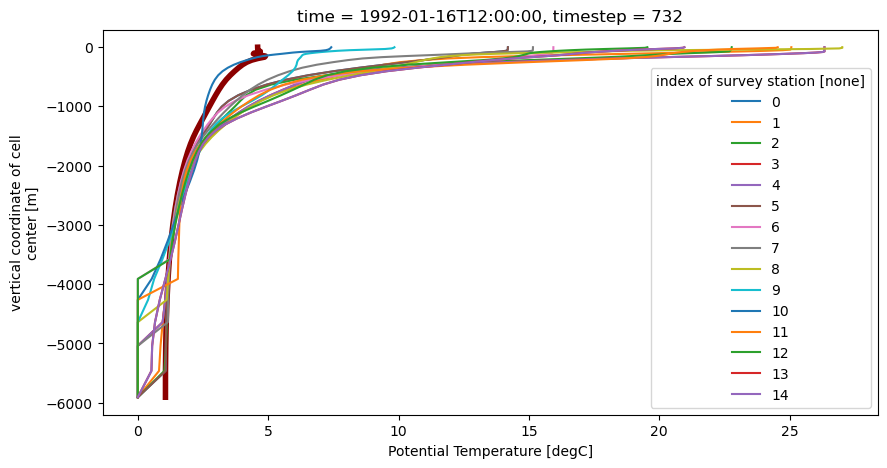

In [16]:
od_single._ds['THETA'].isel(time=0).plot.line(y='Z', color='darkred', lw=4, label='single');
od_many._ds['THETA'].isel(time=0).plot.line(y='Z');

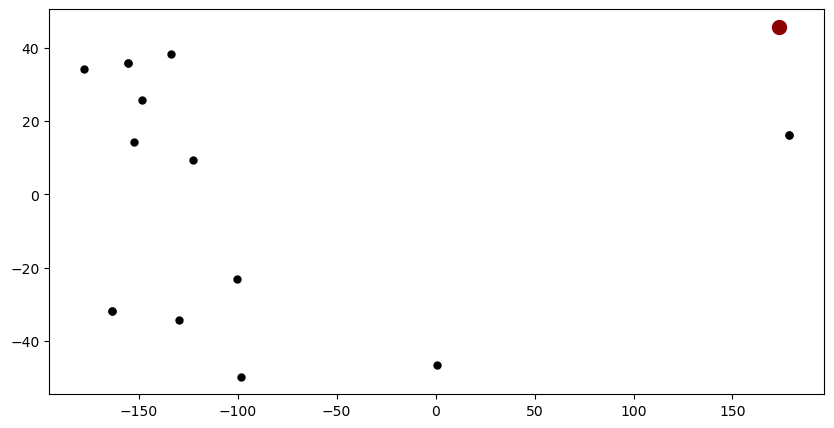

In [17]:
plt.plot(od_many._ds['XC'], od_many._ds['YC'], 'k', ls='', marker='o', markersize=5)
plt.plot(od_single._ds['XC'], od_single._ds['YC'], 'darkred', ls='', marker='o', markersize=10);
